In [4]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
from tqdm import tqdm
import os
import cv2

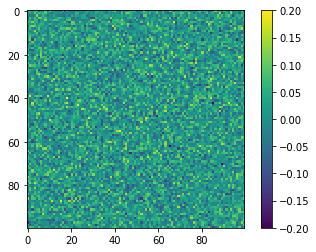

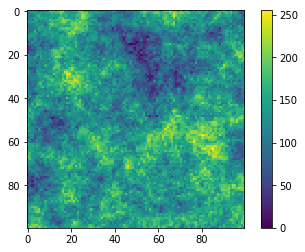

In [5]:
DATADIR = "C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/NonPeriodic/Testing/features"
noise_pct = 0.2
IMG_SIZE=100

for img in os.listdir(DATADIR):
    img_array = np.loadtxt(os.path.join(DATADIR,img))
    img_array /= np.amax(img_array)
    
    noise = ss.fBm(100,2,-1,exp=False)
    noise -= np.amin(noise)
    noise /= np.amax(noise)
    noise *= 2*noise_pct
    noise -= noise_pct
    
    plt.figure()
    plt.imshow(noise)
    plt.colorbar()
    plt.show()
    
    img_array += noise
    img_array -= np.amin(img_array)
    img_array /= np.amax(img_array)
    img_array *= 255.
    img_array = img_array.astype(int)
    
    plt.figure()
    plt.imshow(img_array)
    plt.colorbar()
    plt.show()
    break

In [3]:
labels = np.loadtxt("C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/NonPeriodic/Testing/labels/labels.txt")

In [36]:
training_data = []

def create_training_data():
    c=0
    for img in tqdm(os.listdir(DATADIR)):
        img_array = np.loadtxt(os.path.join(DATADIR,img))
        img_array /= np.amax(img_array)

        noise = ss.fBm(100,2,-1,exp=False)
        noise -= np.amin(noise)
        noise /= np.amax(noise)
        noise *= 2*noise_pct
        noise -= noise_pct

        img_array += noise
        img_array -= np.amin(img_array)
        img_array /= np.amax(img_array)
        img_array *= 255.
        img_array = img_array.astype(int)
        img_array = img_array.astype(float)

        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,labels[c]])
        c+=1

create_training_data()
print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.46it/s]


1000


In [37]:
import random

random.shuffle(training_data)

In [38]:

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0])    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[ 143.   98.   87. ...,  126.  137.  137.]
 [ 136.   88.   94. ...,  130.  124.  139.]
 [ 125.  112.  104. ...,  144.  160.  141.]
 ..., 
 [ 183.  195.  197. ...,  116.  118.  127.]
 [ 188.  145.  179. ...,  112.   41.  137.]
 [ 191.  180.  211. ...,  105.  113.   80.]]
[[[[ 143.]
   [  98.]
   [  87.]
   ..., 
   [ 126.]
   [ 137.]
   [ 137.]]

  [[ 136.]
   [  88.]
   [  94.]
   ..., 
   [ 130.]
   [ 124.]
   [ 139.]]

  [[ 125.]
   [ 112.]
   [ 104.]
   ..., 
   [ 144.]
   [ 160.]
   [ 141.]]

  ..., 
  [[ 183.]
   [ 195.]
   [ 197.]
   ..., 
   [ 116.]
   [ 118.]
   [ 127.]]

  [[ 188.]
   [ 145.]
   [ 179.]
   ..., 
   [ 112.]
   [  41.]
   [ 137.]]

  [[ 191.]
   [ 180.]
   [ 211.]
   ..., 
   [ 105.]
   [ 113.]
   [  80.]]]]


In [39]:
import pickle

pickle_out = open("C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/NoisyNonPeriodic/50pct/Testing/X_test.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/NoisyNonPeriodic/50pct/Testing/y_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()